In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['font.family'] = 'Arial'

In [3]:
import os
import sys

src_dir = './../../src/'
sys.path[0] = src_dir

import matplotlib.pyplot as plt


import numpy as np
import pandas as pd
import seaborn as sns


from access_biology_data import properties, annotation
from access_science_shared import standardizer 

In [4]:
sys.path.append('./../src/')
from aging_tools import inout, export

from access_science_shared import standardizer, utils

In [5]:
from scipy.stats import mannwhitneyu

In [6]:
from scipy.stats import spearmanr

In [7]:
from scipy.stats import spearmanr
from natsort import natsorted

In [8]:
save_images = False

In [9]:
outfolder = '220605_lu_2020'

In [10]:
taxon_id = 10090

In [11]:
ref_genes = standardizer.reference_genes(taxon_id, 'orp')
pr = properties.genbank_validated_rna(taxon_id)[
    ['gene_ncbi', 'Genbank_validated_RNA: full_SumACGT']
].rename(columns={
    'Genbank_validated_RNA: full_SumACGT': 'length'
})

pr.loc[:, 'log_length'] = np.log10(pr['length'])
pr = pr[pr['gene_ncbi'].isin(ref_genes)]

/Users/tstoeger/opt/miniconda3/envs/aging/lib/python3.7/site-packages/fastparquet/dataframe.py:5: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import CategoricalIndex, RangeIndex, Index, MultiIndex


In [12]:
from access_biology_data import meta

In [13]:
gi = meta.gene_info(taxon_id)

In [14]:
p = inout.get_internal_path(
    'datasets/general/resources/publications/lu_2020/41586_2020_2975_MOESM11_ESM.xlsx'
)

In [15]:
df = pd.read_excel(p, skiprows=3, sheet_name='4c, d')

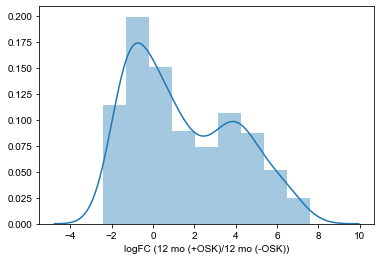

In [17]:
sns.distplot(df['logFC (12 mo (+OSK)/12 mo (-OSK))'])

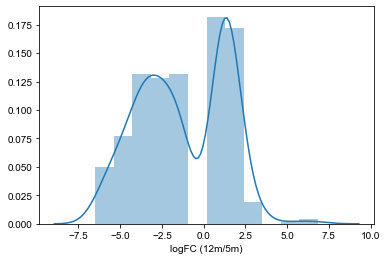

In [18]:
sns.distplot(df['logFC (12m/5m)'])

In [16]:
ref_genes = standardizer.reference_genes(taxon_id, 'orp')
pr = properties.genbank_validated_rna(taxon_id)[
    ['gene_ncbi', 'Genbank_validated_RNA: full_SumACGT']
].rename(columns={
    'Genbank_validated_RNA: full_SumACGT': 'length'
})

pr.loc[:, 'log_length'] = np.log10(pr['length'])
pr = pr[pr['gene_ncbi'].isin(ref_genes)]

In [17]:
h = pd.merge(
    df.drop('length', 1).rename(columns={'gene': 'symbol_ncbi'}),
    gi[['gene_ncbi', 'symbol_ncbi']]

)


In [18]:
h = pd.merge(h, pr)

In [19]:
h['up'] = h['logFC (12 mo (+OSK)/12 mo (-OSK))'] > 0

In [ ]:
h['up'].mean()

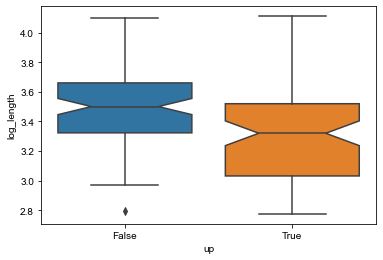

In [20]:
sns.boxplot(x='up', y='log_length', data=h, notch=True)



if save_images:
    export.export_image(
        f'{outfolder}/osk.pdf'
    )

In [21]:
h['up'].value_counts()

False    94
True     84
Name: up, dtype: int64

In [22]:
from scipy.stats import spearmanr

In [23]:
mannwhitneyu(
    h[h['up']==False]['log_length'],
    h[h['up']==True]['log_length'],
    alternative='two-sided'
)

MannwhitneyuResult(statistic=5438.5, pvalue=1.414607656421537e-05)

In [24]:
h['up'] = h['logFC (12m/5m)'] > 0

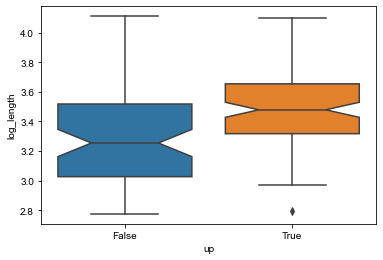

In [25]:
sns.boxplot(x='up', y='log_length', data=h, notch=True)



if save_images:
    export.export_image(
        f'{outfolder}/old_vs_young.pdf'
    )

In [26]:
mannwhitneyu(
    h[h['up']==False]['log_length'],
    h[h['up']==True]['log_length'],
    alternative='two-sided'
)

MannwhitneyuResult(statistic=2374.0, pvalue=2.846855694924906e-05)

In [27]:
h['up'].value_counts()

True     108
False     70
Name: up, dtype: int64